# Data-X Spring 2019: Homework 06 

## Name :Casey Chadwell
## SID :3033291861
## Course (IEOR 135/290) :135

### Machine Learning



In this homework, you will do some exercises with prediction. We will cover these algorithms in class, but this is for you to have some hands on with these in scikit-learn. You can refer - https://github.com/ikhlaqsidhu/data-x/blob/master/05a-tools-predicition-titanic/titanic.ipynb

Display all your outputs.


In [1]:
import numpy as np
import pandas as pd

In [2]:
 # machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import linear_model



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 








In [3]:
df = pd.read_csv('diabetesdata.csv')
df.head()


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,72,0,33.6,0.627,50.0,1
1,1,NaN,66,0,26.6,0.351,31.0,0
2,8,183.0,64,0,23.3,0.672,NaN,1
3,1,NaN,66,94,28.1,0.167,21.0,0
4,0,137.0,40,168,43.1,2.288,33.0,1


**2. Calculate the percentage of Null values in each column and display it. **

In [4]:
df.isnull().mean()*100

TimesPregnant    0.000000
glucoseLevel     4.427083
BP               0.000000
insulin          0.000000
BMI              0.000000
Pedigree         0.000000
Age              4.296875
IsDiabetic       0.000000
dtype: float64

**3. Split __`data`__  into  __`train_df`__ and __`test_df`__  with 15% as test.**


In [5]:
train_df, test_df = train_test_split(df, test_size = 0.15, random_state = 42)

**4. Display the means of the features in train and test sets. Replace the null values in  __`train_df`__ and __`test_df`__  with the mean of EACH feature column separately for train and test. Display head of the dataframes.**

In [6]:
train_df['glucoseLevel'].fillna(train_df['glucoseLevel'].mean(), inplace = True)
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)
train_df.head()

C:\Users\casey\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
227,3,162.0,52,0,37.2,0.652,24.0,1
168,4,110.0,66,0,31.9,0.471,29.0,0
513,2,91.0,62,0,27.3,0.525,22.0,0
7,10,115.0,0,0,35.3,0.134,29.0,0
196,1,105.0,58,0,24.3,0.187,21.0,0


In [7]:
test_df['glucoseLevel'].fillna(test_df['glucoseLevel'].mean(), inplace = True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
test_df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
668,6,98.000000,58,190,34.0,0.430,43.000000,0
324,2,112.000000,75,0,35.7,0.148,21.000000,0
624,2,108.000000,64,0,30.8,0.158,21.000000,0
690,8,121.720721,80,0,24.6,0.856,35.232143,0
473,7,136.000000,90,0,29.9,0.210,50.000000,0


**5. Split __`train_df`__ & __`test_df`__   into  __`X_train`__, __`Y_train`__  and __`X_test`__, __`Y_test`__. __`Y_train`__  and __`Y_test`__ should only have the column we are trying to predict,  __`IsDiabetic`__.**

In [8]:
X_train = train_df.drop("IsDiabetic", axis=1) 
Y_train = train_df["IsDiabetic"]              

X_test = test_df.drop("IsDiabetic", axis=1) 
Y_test = test_df["IsDiabetic"]              

**6. Use this dataset to train perceptron, logistic regression and random forest models using 15% test split. Report training and test accuracies. Try different hyperparameter values for these models and see if you can improve your accuracies.**

In [9]:
# 6a. Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_logreg = logreg.score(X_test, Y_test)

print('Logistic Regression Accuracy:', str(round(acc_logreg*100,2)),'%')

Logistic Regression Accuracy: 77.59 %


C:\Users\casey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
logreg = LogisticRegression(solver = 'liblinear', penalty = 'l2', tol = 1e-6)
logreg.fit(X_train, Y_train)
acc_logreg = logreg.score(X_test, Y_test)

print('Logistic Regression Accuracy:', str(round(acc_logreg*100,2)),'%')

Logistic Regression Accuracy: 77.59 %


In [12]:
# 6b. Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
acc_perceptron = perceptron.score(X_test, Y_test)

print('Perceptron Accuracy:', str(round(acc_perceptron*100,2)),'%')


Perceptron Accuracy: 39.66 %


C:\Users\casey\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [13]:
# 6c. Random Forest
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train, Y_train)
acc_rf = random_forest.score(X_test, Y_test)

print('Random Forest Accuracy:', str(round(acc_rf*100,2)),'%')


Random Forest Accuracy: 76.72 %


In [14]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest:',model.score( X , y ))

plot_model_var_imp(random_forest, X_train, Y_train)

Training accuracy Random Forest: 1.0


**7. For your logistic regression model - **

**a . Compute the log probability of classes in  __`IsDiabetic`__ for the first 10 samples of your train set and display it. Also display the predicted class for those samples from your logistic regression model trained before. **


In [15]:
logprob_train = logreg.predict_log_proba(X_train.head(10))
print("Log Probabilities in Train:\n\n", logprob_train)

y_pred_train = logreg.predict(X_train.head(10))
print("\nPredicted Classes:\n\n", y_pred_train)

Log Probabilities in Train:

 [[-1.20706039 -0.3553546 ]
 [-0.3232679  -1.28655737]
 [-0.13362277 -2.07880216]
 [-1.21333767 -0.35268812]
 [-0.13017182 -2.10327998]
 [-0.31625699 -1.30516467]
 [-0.37830404 -1.15525309]
 [-0.15821037 -1.92189213]
 [-0.4094158  -1.09075743]
 [-0.52581689 -0.89421697]]

Predicted Classes:

 [1 0 0 1 0 0 0 0 0 0]


**b . Now compute the log probability of classes in  __`IsDiabetic`__ for the first 10 samples of your test set and display it. Also display the predicted class for those samples from your logistic regression model trained before.
 (using the model trained on the training set)**


In [16]:
logprob_test = logreg.predict_log_proba(X_test.head(10))
print("Log Probabilities in Test:\n\n", logprob_test)

y_pred_test = logreg.predict(X_test.head(10))
print("\nPredicted Classes:\n\n", X_test.head(10))

Log Probabilities in Test:

 [[-0.40432953 -1.10088733]
 [-0.22829955 -1.5890757 ]
 [-0.19232889 -1.74317207]
 [-0.4341126  -1.04366769]
 [-0.56977255 -0.83391402]
 [-0.50399021 -0.92663226]
 [-0.19542493 -1.72870062]
 [-1.0468712  -0.43237549]
 [-0.72834766 -0.65914375]
 [-1.00460739 -0.45600349]]

Predicted Classes:

      TimesPregnant  glucoseLevel  BP  insulin   BMI  Pedigree        Age
668              6     98.000000  58      190  34.0     0.430  43.000000
324              2    112.000000  75        0  35.7     0.148  21.000000
624              2    108.000000  64        0  30.8     0.158  21.000000
690              8    121.720721  80        0  24.6     0.856  35.232143
473              7    136.000000  90        0  29.9     0.210  50.000000
204              6    103.000000  72      190  37.7     0.324  55.000000
97               1    121.720721  48       76  20.4     0.323  22.000000
336              0    117.000000   0        0  33.8     0.932  44.000000
568              4   

**c . What can you interpret from the log probabilities and the predicted classes?**



This gives the 'position' of the sample relative to the sigmoid loss function. The class that is predicted is the one with the larger log probability. The closer the two probabilities are to one another, the harder the sample is to classify. (I verified this to myself with the following plots)

In [78]:
logprob_train = logreg.predict_log_proba(X_train)
y_pred_train = logreg.predict(X_train)

logprob_test = logreg.predict_log_proba(X_test)
y_pred_test = logreg.predict(X_test)

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

c1_train = logprob_train[:,0]
c2_train = logprob_train[:,1]

c1_test = logprob_test[:,0]
c2_test = logprob_test[:,1]

lpdf_tr = pd.DataFrame({
    'c1':c1_train, 
    'c2':c2_train, 
    'Predicted':y_pred_train,
})

lpdf_te = pd.DataFrame({
    'c1':c1_test,
    'c2':c2_test,
    'Predicted':y_pred_test,
    'Mag':np.sqrt(c1_test**2 + c2_test**2),
    'Diff':c2_test - c1_test,
    'Accurate?':y_pred_test == Y_test
})

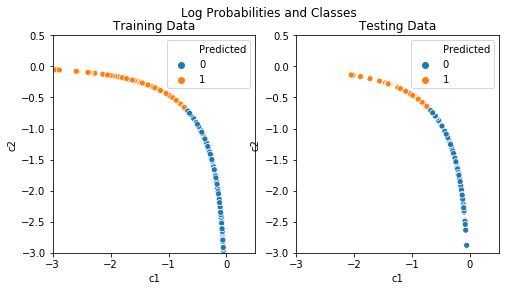

In [80]:
fig = plt.figure(figsize = (8,4));
plt.suptitle('Log Probabilities and Classes');

plt.subplot(121);
sns.scatterplot(data = lpdf_tr, x = 'c1', y = 'c2', hue = 'Predicted');
plt.xlim([-3,0.5]);
plt.ylim([-3,0.5]);
plt.title('Training Data');

plt.subplot(122);
sns.scatterplot(data = lpdf_te, x = 'c1', y = 'c2', hue = 'Predicted');
plt.xlim([-3,0.5]);
plt.ylim([-3,0.5]);
plt.title('Testing Data');

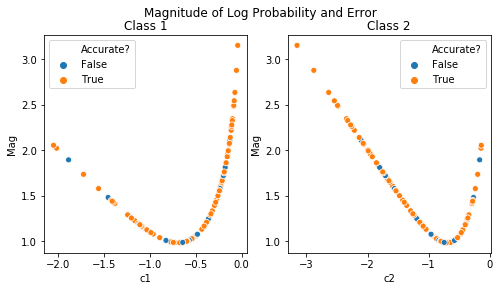

In [81]:
fig = plt.figure(figsize = (8,4));
plt.suptitle('Magnitude of Log Probability and Error');

plt.subplot(121);
sns.scatterplot(data = lpdf_te, x = 'c1', y = 'Mag', hue = 'Accurate?')
plt.title('Class 1');

plt.subplot(122);
sns.scatterplot(data = lpdf_te, x = 'c2', y = 'Mag', hue = 'Accurate?')
plt.title('Class 2');

In [82]:
print('Mean Magnitude of Log Probability for:\n\nOverall:', lpdf_te['Mag'].mean())
print('Classified Correctly:', lpdf_te[lpdf_te['Accurate?'] == True]['Mag'].mean())
print('Classified Incorrectly:',lpdf_te[lpdf_te['Accurate?'] == False]['Mag'].mean())

Mean Magnitude of Log Probability for:

Overall: 1.4953972673782265
Classified Correctly: 1.5672504858599665
Classified Incorrectly: 1.2466745880183554


**8. Is mean imputation is the best type of imputation (as we did in 4.) to use? Why or why not? What are some other ways to impute the data?**

Mean imputation can be good in some situations because the mean stays the same. However for binary classifiers it tends to not be as good because the loss function is nonlinear and it could have a higher impact on the classification than other methods. In other methods of imputation that might work better, the value can be copied from the most similar sample, randomely selected from a group, selected through regression or stochastic regression, or interpolated/extrapolated from the sample's other features.   

## Extra Credit (2 pts) - MANDATORY for students enrolled in IEOR 290


**9.  Implement the K-Nearest Neighbours (https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm for k=1 from scratch in python (do not use KNN from existing libraries). KNN uses Euclidean distance to find nearest neighbors. Split your dataset into test and train as before. Also fill in the null values with mean of features as done earlier. Use this algorithm to predict values for 'IsDiabetic' for your test set. Display your accuracy. **